### Домашняя работа "Оценка точности модели, переобучение, регуляризация"

Посчитать tpr и fpr в ноутбуке к лекции.

Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

Построить график Precision - Recall на этих же данных.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Формируем набор признаков и целевую переменную

X = data[data.columns[:-1]]
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [6]:
Y = data['affair']

In [7]:
model = LogisticRegression()
# model_tree = DecisionTreeClassifier()

# Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [8]:
# Обучаем:
model.fit(X_train, Y_train)

LogisticRegression()

In [10]:
# Получаем прогнозные значения модели (переменная predictions)

predictions = model.predict_proba(X_test)

In [11]:
predictions[:3]

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037]])

In [12]:
model.score(X_train, Y_train)

0.7235188509874326

In [13]:
model.score(X_test, Y_test)

0.7319371727748691

In [20]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [21]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [22]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [23]:
model.score(X_test, Y_test)

0.7319371727748691

### Считаю tpr и fpr:

In [24]:
tpr=tp/(tp+fn)
fpr=fp/(fp+tn)
print(f'tpr={tpr},  fpr={fpr}')

tpr=0.3723228995057661,  fpr=0.10053722179585571


### Убедиться, что график ROC AUC получается таким же, как и штатными средствами.

In [51]:
# посчитаю ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve
import  matplotlib.pyplot as plt

In [52]:
# получаю значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [53]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9292091232671758)
(0.0, 0.0016474464579901153, 0.9292091232671756)
(0.0, 0.008237232289950576, 0.89998862795351)
(0.0007674597083653108, 0.008237232289950576, 0.8977304698527878)
(0.0007674597083653108, 0.019769357495881382, 0.8650840097292727)
(0.0030698388334612432, 0.019769357495881382, 0.8547129971134584)
(0.0030698388334612432, 0.023064250411861616, 0.8544826965581638)
(0.003837298541826554, 0.023064250411861616, 0.8521926884372871)
(0.003837298541826554, 0.03130148270181219, 0.8338303480746599)
(0.004604758250191865, 0.03130148270181219, 0.8336073228587285)


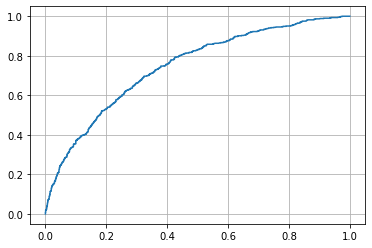

In [55]:
plt.plot( fpr, tpr )
plt.grid()

In [59]:
# второй способ
from sklearn.metrics import roc_curve
import  matplotlib.pyplot as plt

In [57]:
fpr, tpr, _ = roc_curve(Y_test, predictions[:,1])

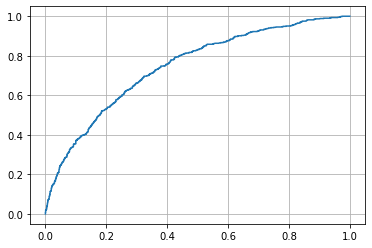

In [60]:
plt.plot( fpr, tpr )
plt.grid()

### Построить график Precision - Recall на этих же данных.

In [64]:
# Построю график Precision - Recall на этих же данных:
from sklearn.metrics import precision_recall_curve

In [67]:
precision, recall, _ = precision_recall_curve(Y_test, predictions[:,1])

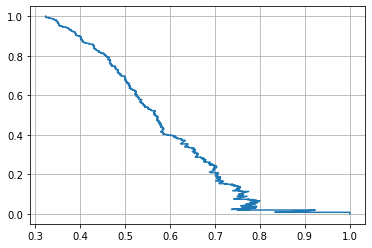

In [70]:
plt.plot( precision, recall )
plt.grid()
#plt.xlim(0,1)
#plt.ylim(0,1)

(0.0, 1.0)

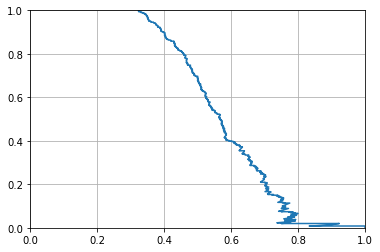

In [71]:
plt.plot( precision, recall )
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)